In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.optimize import root 

In [2]:
## these functions translate the continuous-time rates into discrete time at weekly frequency 

def b2beta(g,
           time_unit_in_years):
    beta = 1-np.exp(-g/time_unit_in_years)
    return beta


def g2gamma(b,
           time_unit_in_years):
    gamma = 1-np.exp(-b/time_unit_in_years)
    return gamma


In [3]:
## estimates from Shiller and Pound (1989)

types = ['INSRAND','INSRPI','INDRAND','INDRPI']
gs_est = [1.84,1.39,3.72,1.73]

## all median
bs_est = [20.66,7.35,12.74,3.71]
## all median 

In [4]:
def SIR(beta,
        gamma,
        T,
        x0):
    s0,i0,r0 = x0
    s_path = [s0]
    i_path = [i0]
    r_path = [r0]
    
    for t in range(T-1):
        s = s_path[t]-beta*s_path[t]*i_path[t] 
        s_path.append(s)
        i = i_path[t]+beta*s_path[t]*i_path[t]-gamma*i_path[t]
        i_path.append(i) 
        r = r_path[t]+gamma*i_path[t]
        r_path.append(r)
    return s_path,i_path, r_path

In [5]:
## some parameters to testing 
beta = 0.1
gamma = 0.03
i0 = 0.01
s0 = 1-i0
r0 = 0.0 
x0 = (s0,i0,r0)
T = 204
times = range(T)

In [6]:
### Solve final values/ Steady State fraction

def final_R_eq(r_fraction,
                  beta,
                  gamma):
    return 1-r_fraction- np.exp(-beta/gamma*r_fraction)


def solve_r_ss(beta,
              gamma):
    eq = lambda R_SS: final_R_eq(R_SS,
                                 beta,
                                 gamma)
    r_ss = root(eq,
               x0 =0.6).x
    return r_ss

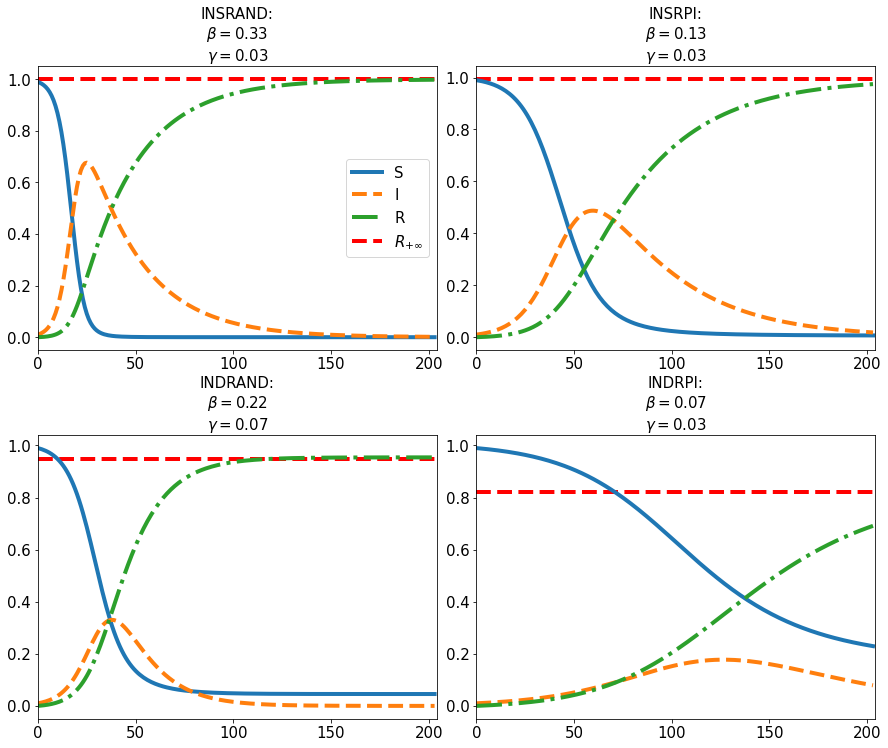

In [7]:
## plot different simulated paths 
if __name__ == "__main__":
    ## configurations of the plot
    lw = 4
    lbsize = 15

    ## plot
    fig, axs = plt.subplots(2,2, 
                            figsize=(15, 12), 
                            facecolor='w', 
                            edgecolor='k')
    fig.subplots_adjust(hspace = 0.3, wspace=.1)

    axs = axs.ravel()
    nb = len(types)

    nbw1y = 52

    for x in range(nb):
        g = gs_est[x]
        gamma = g2gamma(g,nbw1y)
        b = bs_est[x]
        beta = b2beta(b,nbw1y)
        r_ss = solve_r_ss(beta,gamma)
        
        s,i,r = SIR(beta, # infection rate
                    gamma, # recovery rate 
                    T,
                    x0)
        title = types[x]+':\n'+r'$\beta={}$'.format(round(beta,2))+'\n'+r'$\gamma ={}$'.format(round(gamma,2))
        axs[x].set_title(title,fontsize=lbsize)
        axs[x].hlines(r_ss,
                      0.0,
                      T,
                      color='r',
                      linestyle ='dashed',
                      lw=lw,
                      label=r'$R_{+\infty}$')

        axs[x].plot(times,s,'-',lw=lw,label='S')

        axs[x].plot(times,i,'--',lw=lw,label='I')

        axs[x].plot(times,r,'-.',lw=lw,label='R')
        axs[x].set_xlim(0.0,T)

        axs[0].legend(loc=0,prop={'size': 15})
        axs[x].tick_params(axis='x', labelsize=lbsize)
        axs[x].tick_params(axis='y', labelsize=lbsize)

    #plt.savefig("../figure/sir_simulate.png", 
    #            format="PNG")

In [8]:
solve_r_ss(0.03,0.08)

array([-4.92688762e-17])